# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [3]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [4]:
train, test = keras.datasets.cifar10.load_data()

In [5]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [6]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [15]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
NESTEROV = True

In [17]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

OPTIMIZERS = ['SGD', 'RMSprop', 'AdaGrad', 'Adam']


for optimizers in OPTIMIZERS:
    for lr in LEARNING_RATE:
        sgd = keras.optimizers.SGD(learning_rate = lr, nesterov = NESTEROV, momentum = MOMENTUM)
        rmsprop = keras.optimizers.RMSprop(learning_rate = lr, momentum = MOMENTUM)
        adagrad = keras.optimizers.Adagrad(learning_rate = lr)
        adam = keras.optimizers.Adam(learning_rate = lr)
        OPT = {'SGD': sgd, 'RMSprop': rmsprop, 'AdaGrad': adagrad, 'Adam': adam}
        
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with Optimizers = %s" % str(optimizers))
        print("learning_rate = ", lr)
        model = build_mlp(input_shape = x_train.shape[1:])
        model.summary()
        optimizer = OPT[optimizers]
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "OPT-%s-%0.6f" % (str(optimizers), lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with Optimizers = SGD
learning_rate =  0.01
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 2s 11ms/

196/196 [==============================] - 2s 10ms/step - loss: 0.3838 - accuracy: 0.8598 - val_loss: 2.3329 - val_accuracy: 0.5197
Experiment with Optimizers = SGD
learning_rate =  0.001
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable param

196/196 [==============================] - 2s 11ms/step - loss: 0.8966 - accuracy: 0.6863 - val_loss: 1.3623 - val_accuracy: 0.5371
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 0.8841 - accuracy: 0.6924 - val_loss: 1.4083 - val_accuracy: 0.5238
Experiment with Optimizers = SGD
learning_rate =  0.0001
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________________________________________________________

196/196 [==============================] - 2s 10ms/step - loss: 1.5619 - accuracy: 0.4529 - val_loss: 1.5779 - val_accuracy: 0.4412
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5574 - accuracy: 0.4554 - val_loss: 1.5733 - val_accuracy: 0.4452
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5534 - accuracy: 0.4560 - val_loss: 1.5693 - val_accuracy: 0.4458
Experiment with Optimizers = RMSprop
learning_rate =  0.01
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
____________________________________________

196/196 [==============================] - 2s 12ms/step - loss: 2.3104 - accuracy: 0.0992 - val_loss: 2.3113 - val_accuracy: 0.1000
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3093 - accuracy: 0.0995 - val_loss: 2.3062 - val_accuracy: 0.1000
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3110 - accuracy: 0.0981 - val_loss: 2.3088 - val_accuracy: 0.1000
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 2.3105 - accuracy: 0.1005 - val_loss: 2.3194 - val_accuracy: 0.1000
Experiment with Optimizers = RMSprop
learning_rate =  0.001
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_______________________________

196/196 [==============================] - 2s 11ms/step - loss: 2.1239 - accuracy: 0.1704 - val_loss: 2.0828 - val_accuracy: 0.1740
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0861 - accuracy: 0.1746 - val_loss: 2.0775 - val_accuracy: 0.1804
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 2.0965 - accuracy: 0.1762 - val_loss: 2.0656 - val_accuracy: 0.1897
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 2.1045 - accuracy: 0.1765 - val_loss: 2.1284 - val_accuracy: 0.1737
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 2.1283 - accuracy: 0.1689 - val_loss: 2.1230 - val_accuracy: 0.1761
Experiment with Optimizers = RMSprop
learning_rate =  0.0001
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
__________________

196/196 [==============================] - 2s 11ms/step - loss: 0.8487 - accuracy: 0.6959 - val_loss: 1.9326 - val_accuracy: 0.5015
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8459 - accuracy: 0.6965 - val_loss: 1.8911 - val_accuracy: 0.5001
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8176 - accuracy: 0.7061 - val_loss: 1.9624 - val_accuracy: 0.4993
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8360 - accuracy: 0.6997 - val_loss: 1.9474 - val_accuracy: 0.4988
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7980 - accuracy: 0.7135 - val_loss: 1.9874 - val_accuracy: 0.4916
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7980 - accuracy: 0.7120 - val_loss: 1.9916 - val_accuracy: 0.4900
Experiment with Optimizers = AdaGrad
learning_rate =  0.01
Model: "model"
_________________________________________________________________
Layer (t

196/196 [==============================] - 2s 10ms/step - loss: 1.0758 - accuracy: 0.6265 - val_loss: 1.3663 - val_accuracy: 0.5181
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0637 - accuracy: 0.6300 - val_loss: 1.3630 - val_accuracy: 0.5170
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0546 - accuracy: 0.6329 - val_loss: 1.3452 - val_accuracy: 0.5256
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0389 - accuracy: 0.6404 - val_loss: 1.4317 - val_accuracy: 0.5015
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0338 - accuracy: 0.6401 - val_loss: 1.3705 - val_accuracy: 0.5167
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0267 - accuracy: 0.6424 - val_loss: 1.6158 - val_accuracy: 0.4596
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.0216 - accuracy: 0.6451 - val_loss: 1.4541 - val_accuracy: 0.4941
Expe

196/196 [==============================] - 2s 10ms/step - loss: 1.5427 - accuracy: 0.4635 - val_loss: 1.5645 - val_accuracy: 0.4522
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5383 - accuracy: 0.4636 - val_loss: 1.5602 - val_accuracy: 0.4525
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5343 - accuracy: 0.4668 - val_loss: 1.5570 - val_accuracy: 0.4530
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5299 - accuracy: 0.4669 - val_loss: 1.5589 - val_accuracy: 0.4488
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5260 - accuracy: 0.4691 - val_loss: 1.5533 - val_accuracy: 0.4535
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 1.5218 - accuracy: 0.4693 - val_loss: 1.5487 - val_accuracy: 0.4556
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5186 - accuracy: 0.4711 - val_loss: 1.5427 - val_accuracy: 0.4551
Epoc

196/196 [==============================] - 2s 10ms/step - loss: 1.8782 - accuracy: 0.3465 - val_loss: 1.8778 - val_accuracy: 0.3455
Epoch 43/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8749 - accuracy: 0.3473 - val_loss: 1.8748 - val_accuracy: 0.3461
Epoch 44/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8719 - accuracy: 0.3484 - val_loss: 1.8719 - val_accuracy: 0.3485
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8689 - accuracy: 0.3496 - val_loss: 1.8690 - val_accuracy: 0.3485
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8661 - accuracy: 0.3508 - val_loss: 1.8662 - val_accuracy: 0.3514
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8633 - accuracy: 0.3510 - val_loss: 1.8636 - val_accuracy: 0.3518
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 1.8606 - accuracy: 0.3529 - val_loss: 1.8608 - val_accuracy: 0.3515
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.4651 - accuracy: 0.4755 - val_loss: 1.5921 - val_accuracy: 0.4435
Epoch 42/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4534 - accuracy: 0.4813 - val_loss: 1.6040 - val_accuracy: 0.4296
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4526 - accuracy: 0.4794 - val_loss: 1.6338 - val_accuracy: 0.4346
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4437 - accuracy: 0.4827 - val_loss: 1.6022 - val_accuracy: 0.4392
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4409 - accuracy: 0.4831 - val_loss: 1.5425 - val_accuracy: 0.4568
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4418 - accuracy: 0.4840 - val_loss: 1.5497 - val_accuracy: 0.4552
Epoch 47/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4436 - accuracy: 0.4840 - val_loss: 1.6086 - val_accuracy: 0.4374
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 0.7829 - accuracy: 0.7188 - val_loss: 1.6132 - val_accuracy: 0.5191
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7627 - accuracy: 0.7276 - val_loss: 1.5805 - val_accuracy: 0.5255
Epoch 42/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7556 - accuracy: 0.7299 - val_loss: 1.5789 - val_accuracy: 0.5234
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7410 - accuracy: 0.7352 - val_loss: 1.6223 - val_accuracy: 0.5121
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7269 - accuracy: 0.7415 - val_loss: 1.6587 - val_accuracy: 0.5125
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 0.7109 - accuracy: 0.7444 - val_loss: 1.6687 - val_accuracy: 0.5206
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 0.6940 - accuracy: 0.7535 - val_loss: 1.6736 - val_accuracy: 0.5134
Epoc

196/196 [==============================] - 2s 12ms/step - loss: 0.9335 - accuracy: 0.6794 - val_loss: 1.3318 - val_accuracy: 0.5385
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9307 - accuracy: 0.6788 - val_loss: 1.3773 - val_accuracy: 0.5225
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9214 - accuracy: 0.6810 - val_loss: 1.3280 - val_accuracy: 0.5424
Epoch 42/50
196/196 [==============================] - 2s 11ms/step - loss: 0.9096 - accuracy: 0.6878 - val_loss: 1.3296 - val_accuracy: 0.5370
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8900 - accuracy: 0.6932 - val_loss: 1.3337 - val_accuracy: 0.5397
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8819 - accuracy: 0.6933 - val_loss: 1.3731 - val_accuracy: 0.5342
Epoch 45/50
196/196 [==============================] - 2s 11ms/step - loss: 0.8713 - accuracy: 0.7003 - val_loss: 1.3362 - val_accuracy: 0.5453
Epoc

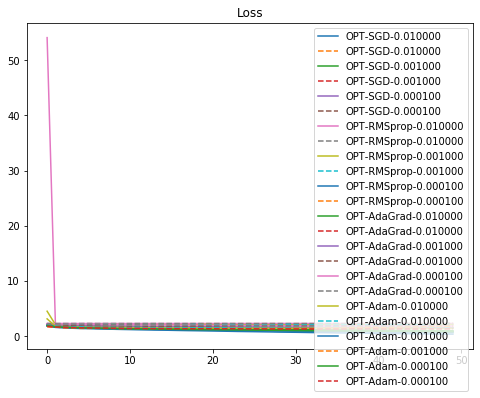

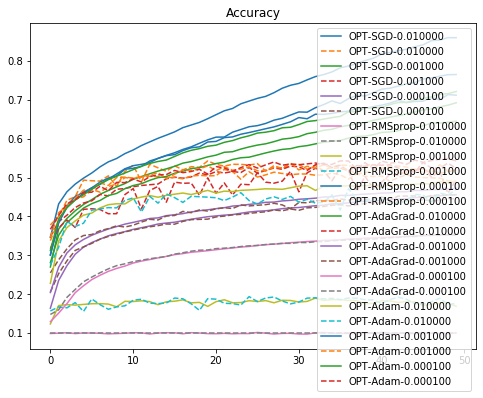

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
# color_bar = ["r", "g", "b", "y", "m", "k", "r", "g", "b", "y", "m", "k"]
color_bar = ['#DDDDFF','#7D7DFF','#0000C6','#000079','#CEFFCE','#28FF28','#007500','#FFFF93', '#DDDDFF','#7D7DFF','#0000C6','#000079']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)#, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)#, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

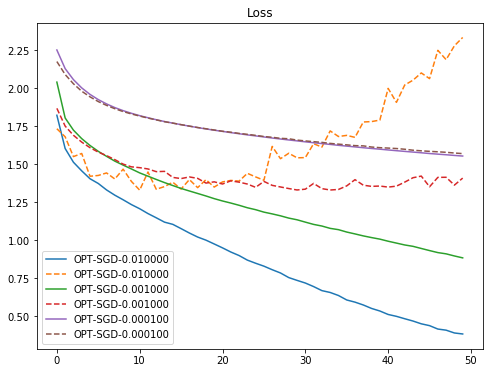

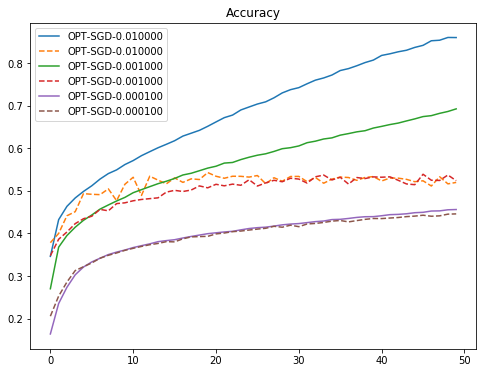

In [27]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [3,4,5,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)#, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [3,4,5,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)#, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

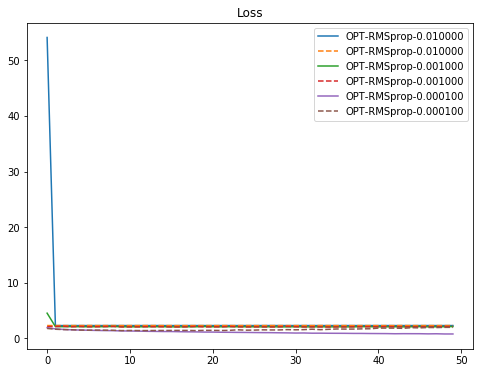

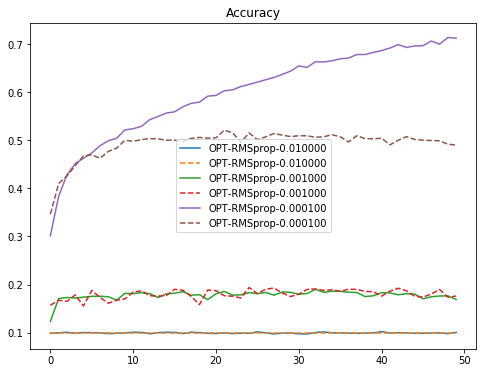

In [28]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)#, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,6,7,8,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)#, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

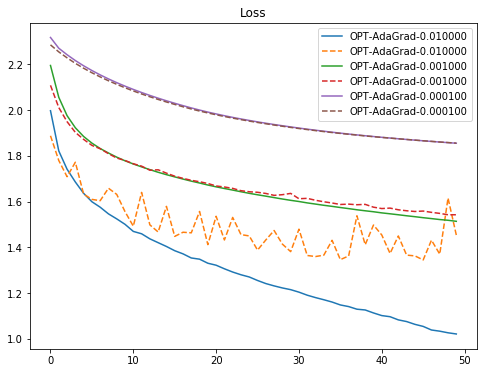

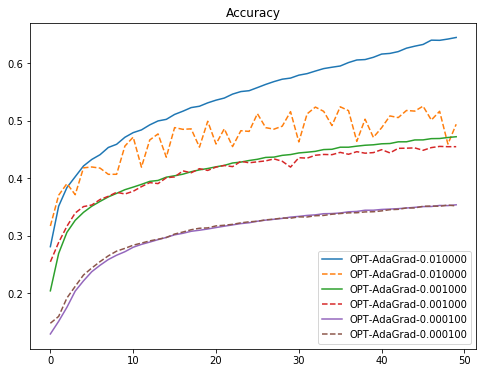

In [29]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)#, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,9,10,11]: continue
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)#, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

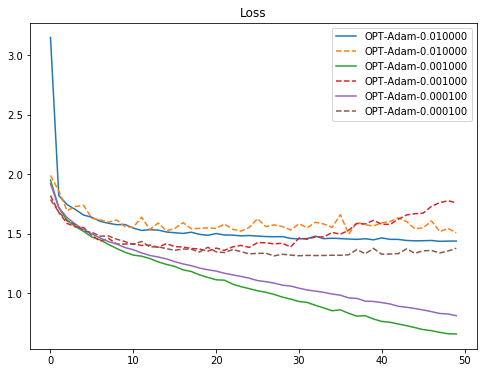

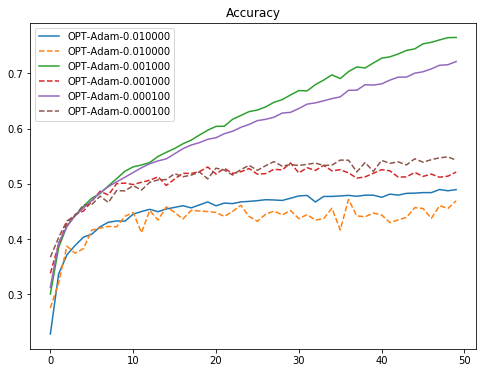

In [30]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,6,7,8]: continue
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)#, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    if i in [0,1,2,3,4,5,6,7,8]: continue
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)#, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)#, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

以此範例而言 SGD表現結果較佳，而在其他優化器下，可以看到一些因為學習速率太快造成精準度沒辦法達到比較高的現象出現(SGD則相反)